###**Advanced Regression - House Price Prediction**

**Objectives :**
1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

First we will all the required packages

In [2864]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

###**Importing and understanding the data**
Import the dataset using pandas

In [2865]:
house = pd.read_csv('train.csv')

Set display of all the columns

In [2866]:
pd.options.display.max_columns = 100
#Display sample set of data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2867]:
# Display the shape of the data
house.shape

(1460, 81)

In [2868]:
# check all the columns, non-null values and datatype using info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check for null values

In [2869]:
# display all rows
pd.options.display.max_rows = 100
for i in house.isnull().sum().iteritems():
  if i[1]!=0:
    print(i)


('LotFrontage', 259)
('Alley', 1369)
('MasVnrType', 8)
('MasVnrArea', 8)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinType2', 38)
('Electrical', 1)
('FireplaceQu', 690)
('GarageType', 81)
('GarageYrBlt', 81)
('GarageFinish', 81)
('GarageQual', 81)
('GarageCond', 81)
('PoolQC', 1453)
('Fence', 1179)
('MiscFeature', 1406)


###**Data Cleaning**

In [2870]:
more_missing = house.columns[house.isnull().sum() > house.shape[0]/5]

In [2871]:
more_missing

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

'Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' has the maximum missing values ( more than 50%) we will drop these column

In [2872]:
house.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1, inplace=True)

In [2873]:
for i in house.isnull().sum().iteritems():
  if i[1]!=0:
    print(i)

('LotFrontage', 259)
('MasVnrType', 8)
('MasVnrArea', 8)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinType2', 38)
('Electrical', 1)
('GarageType', 81)
('GarageYrBlt', 81)
('GarageFinish', 81)
('GarageQual', 81)
('GarageCond', 81)


In [2874]:
missing_values = house.columns[house.isnull().sum() > 0]

In [2875]:
for i in missing_values:
  print(house[i].value_counts())


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attchd     870

In [2876]:
# we will fill 0 for the garage year and area
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['MasVnrArea'] = house['MasVnrArea'].fillna(0.0)
#Convert garageyrblt into integer datatype
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)
# Categorical variable so we fill None
for item in ('MasVnrType', 'Electrical','BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
  house[item] = house[item].fillna('None')


In [2877]:
for i in house.isnull().sum().iteritems():
  if i[1]!=0:
    print(i)

('LotFrontage', 259)


In [2878]:
house.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

we will take the median to fill the missing values for LotFrontage

In [2879]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2880]:
house['LotFrontage'] = house['LotFrontage'].fillna(69.0)


In [2881]:
house.isnull().sum().sum()

0

In [2882]:
print(house['KitchenAbvGr'].value_counts())

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [2883]:
print(house['LowQualFinSF'].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64


'KitchenAbvGr' and 'LowQualFinSF' have maximum same values so we will drop these. And also dropping the ID column as it will not be usefull in the model

In [2884]:
house.drop(['Id','KitchenAbvGr','LowQualFinSF'], axis=1, inplace=True)

Convert all the years to number of years / age

In [2885]:
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()

house['YearBuilt'] = todays_date.year - house['YearBuilt']
house['YearRemodAdd'] = todays_date.year - house['YearRemodAdd']
house['GarageYrBlt'] = todays_date.year - house['GarageYrBlt']
house['YrSold'] = todays_date.year - house['YrSold']
house.shape

(1460, 73)

In [2886]:
house['GarageYrBlt'].head()

0    19
1    46
2    21
3    24
4    22
Name: GarageYrBlt, dtype: int64

###**EDA - Univariate and bivariate**

Text(0.5, 1.0, 'SalePrice')

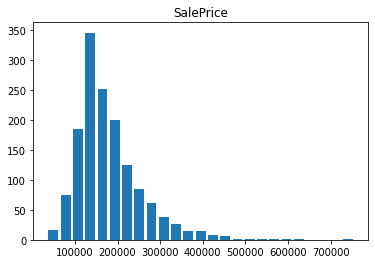

In [2887]:
#plotting a Distribution Plot
plt.hist(house['SalePrice'], rwidth=0.8, bins=25)
plt.title('SalePrice')

We will transform SalePrice to make it follow a bell curve using log transformation 

In [2888]:
house['SalePrice'] = np.log(house['SalePrice'])

In [2889]:
#We will remove outliers
columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
         'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']
q1=house[columns].quantile(0.05)
q3=house[columns].quantile(0.95)
IQR=q3-q1
house=house[~((house[columns] < ( q1 - 1.5 * IQR )) | (house[columns] > ( q3 + 1.5 * IQR))).any(axis=1)]

In [2890]:
house.shape

(1424, 73)

Text(0.5, 1.0, 'SalePrice')

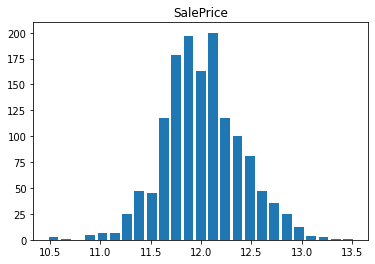

In [2891]:
#plotting a Distribution Plot
plt.hist(house['SalePrice'], rwidth=0.8, bins=25)
plt.title('SalePrice')

Text(0.5, 1.0, 'Co-relation Heatmap')

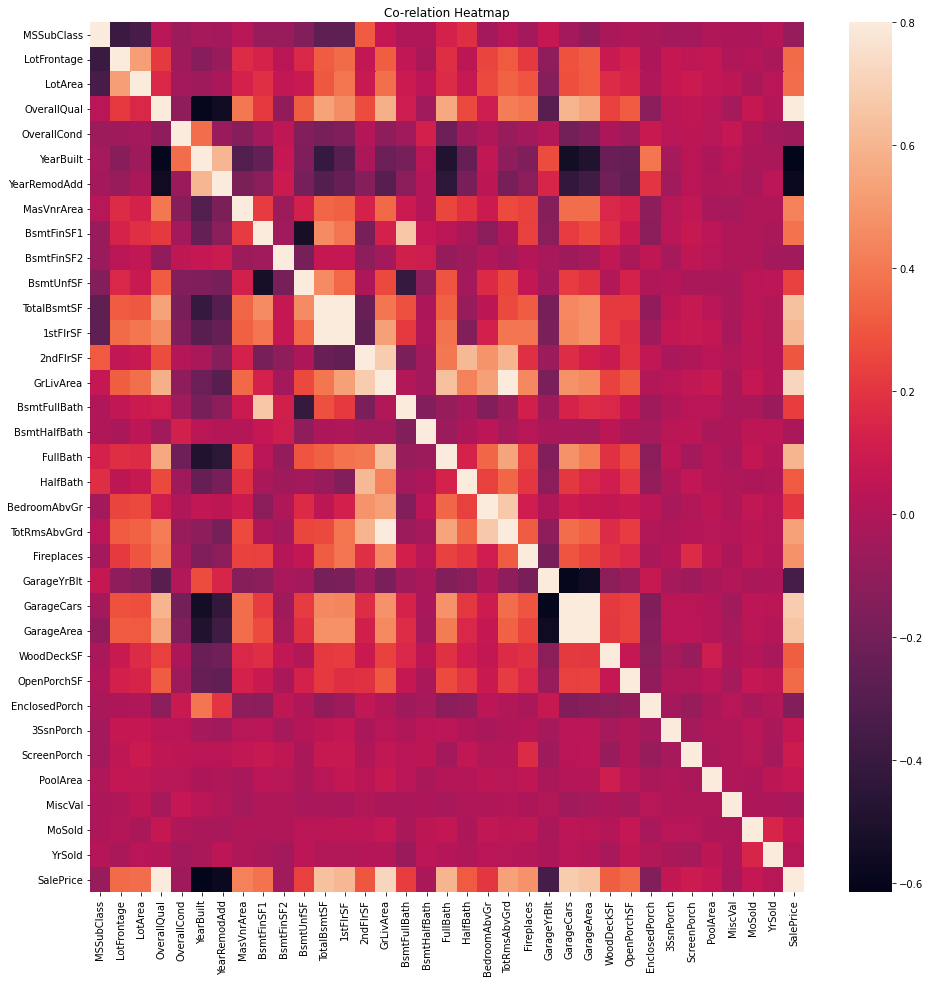

In [2892]:
#checking correlation using heatmap
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(house.corr(), vmax=.8);
plt.title( "Co-relation Heatmap" )

Check which are highly co related

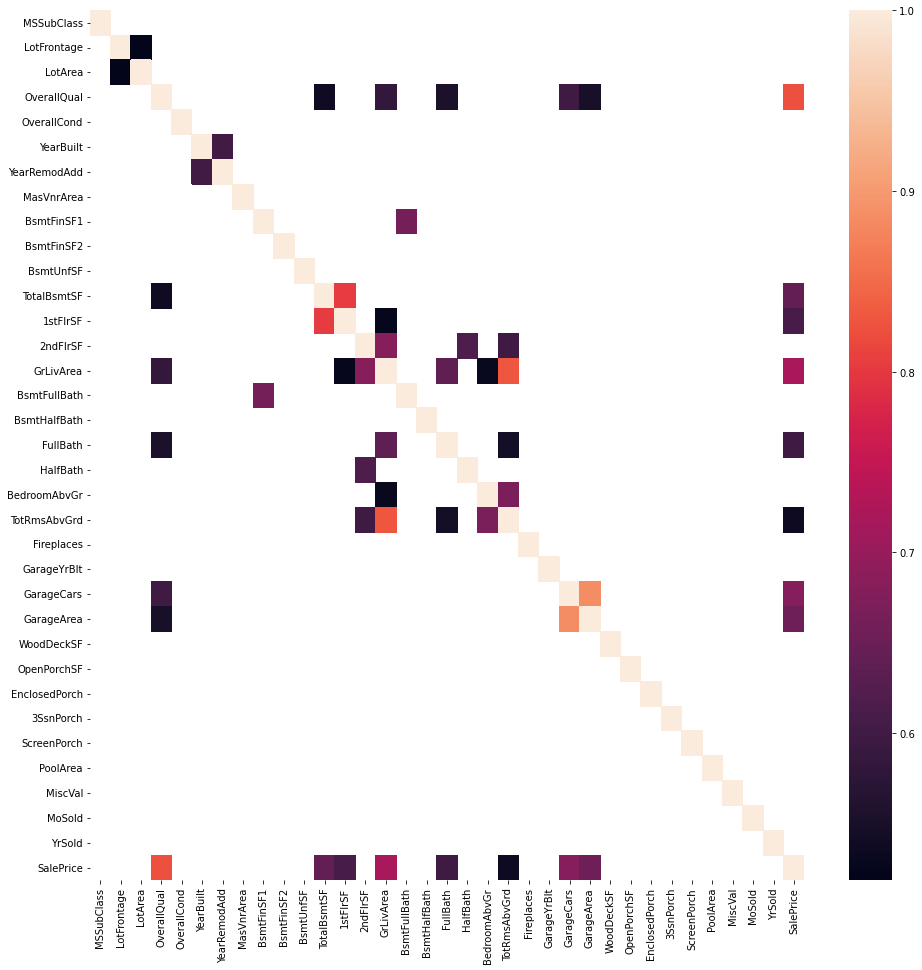

In [2893]:
corr = house.corr()
#highlight all points where coorelation greater than 0.6
corr_high = corr[corr>=.5]
plt.figure(figsize=(16,16))
sns.heatmap(corr_high)

Sale Price is highly corelated with OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea

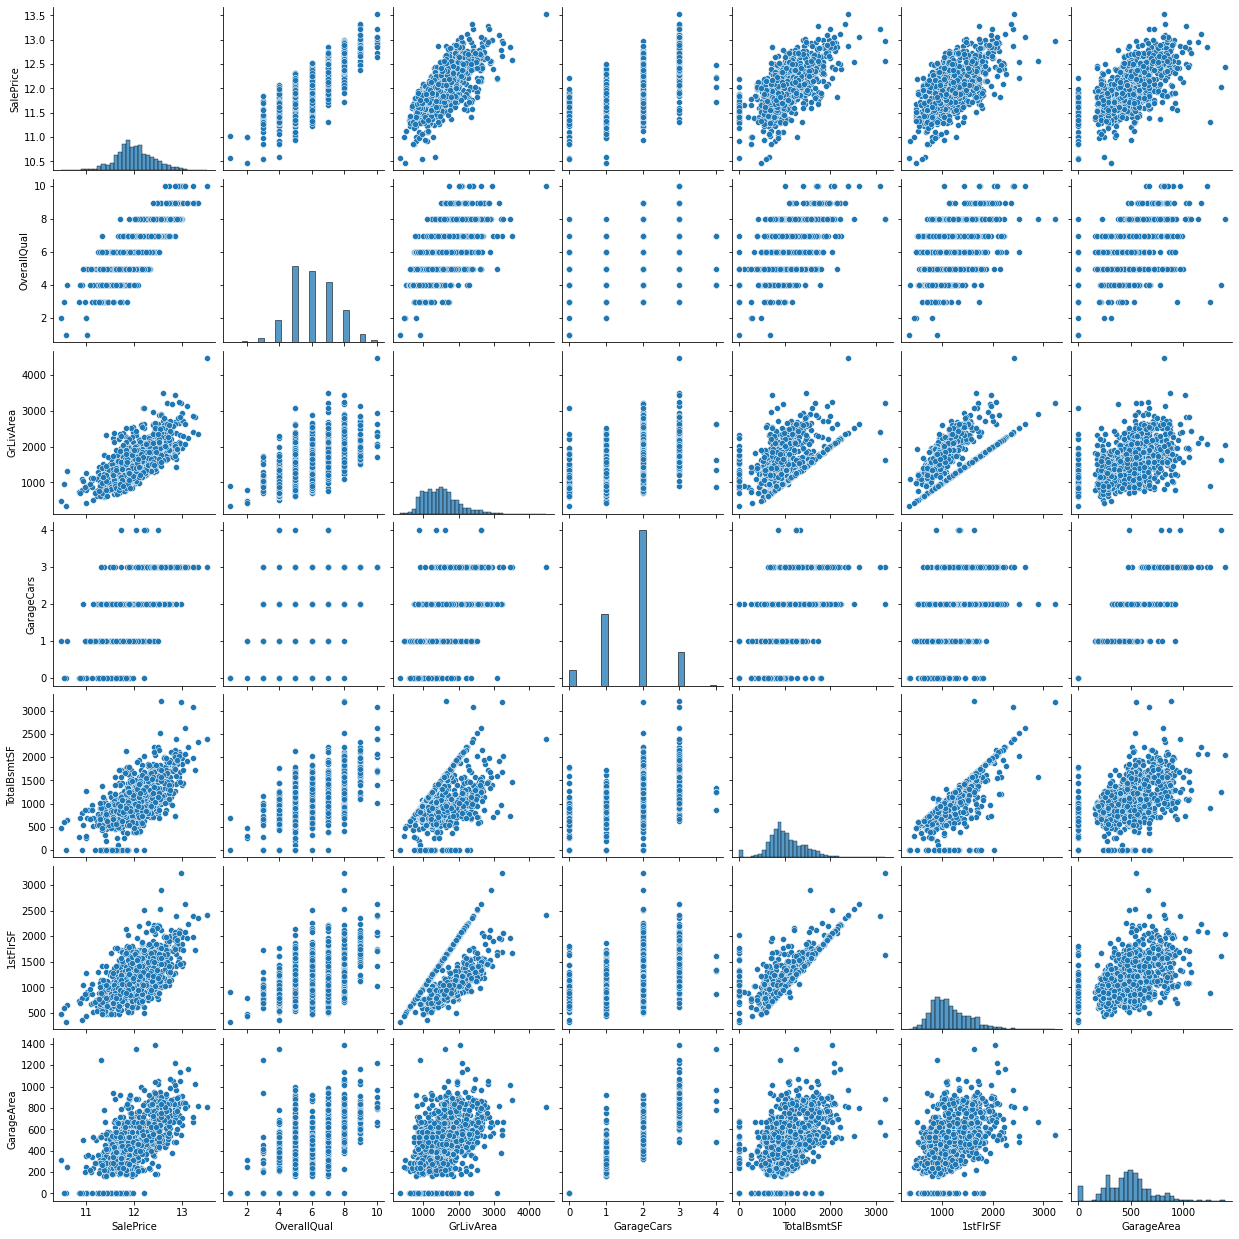

In [2894]:
#Display relation using pairplot
sns.pairplot(house[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'GarageArea' ]])
plt.show()

### Data Preparation


We will first split data into X,y

In [2895]:
X = house
y = house.pop('SalePrice')

We will convert categorical variables into dummy variables

In [2896]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,Gd,8,Typ,0,Attchd,19,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,14,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,46,46,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,TA,6,Typ,1,Attchd,46,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,15,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,21,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,Gd,6,Typ,1,Attchd,21,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,14,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,107,52,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,Gd,7,Typ,1,Detchd,24,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,16,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,22,22,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,Gd,9,Typ,1,Attchd,22,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,14,WD,Normal


In [2897]:
X.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [2898]:
categorical = X.select_dtypes(include=['object'])
#convert variables to dummy variables
dummy_categorical = pd.get_dummies(categorical, drop_first=True)
dummy_categorical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [2899]:
X = pd.concat([X, dummy_categorical], axis=1)
#Drop existing categorical variables
X.drop(categorical.columns, axis=1, inplace=True)
X.shape

(1424, 237)

In [2900]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,19,19,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,8,0,19,2,548,0,61,0,0,0,0,0,2,14,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,46,46,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,6,1,46,2,460,298,0,0,0,0,0,0,5,15,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,21,20,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,6,1,21,2,608,0,42,0,0,0,0,0,9,14,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,107,52,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,7,1,24,3,642,0,35,272,0,0,0,0,2,16,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,22,22,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,9,1,22,3,836,192,84,0,0,0,0,0,12,14,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Perform Train test split

In [2901]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
126,120,69.0,4928,6,5,46,46,0.0,120,0,958,1078,958,0,958,0,0,2,0,2,5,1,45,2,440,0,205,0,0,0,0,0,2,15,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
735,75,60.0,10800,7,7,108,52,0.0,390,0,490,880,880,888,1768,0,0,1,1,2,6,2,108,2,320,0,341,0,0,0,0,0,10,16,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1315,60,85.0,11075,6,5,53,53,0.0,500,276,176,952,1092,1020,2112,0,0,2,1,4,9,2,53,2,576,280,0,0,0,0,0,0,6,14,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
148,20,63.0,7500,7,5,18,17,120.0,680,0,400,1080,1080,0,1080,1,0,1,0,3,6,0,2022,0,0,0,0,0,0,0,0,0,4,14,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1111,60,80.0,10480,7,6,46,46,660.0,403,0,400,803,1098,866,1964,0,0,2,1,4,8,1,46,2,483,0,69,0,0,0,0,0,9,14,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [2902]:
y_train.head()

126     11.759786
735     12.001505
1315    12.239991
148     11.856515
1111    12.230765
Name: SalePrice, dtype: float64

Now to scale the numeric variables

In [2903]:
# we will select all the numeric variables to scale
numeric = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
X_train[numeric].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
126,120,69.0,4928,6,5,46,46,0.0,120,0,958,1078,958,0,958,0,0,2,0,2,5,1,45,2,440,0,205,0,0,0,0,0,2,15
735,75,60.0,10800,7,7,108,52,0.0,390,0,490,880,880,888,1768,0,0,1,1,2,6,2,108,2,320,0,341,0,0,0,0,0,10,16
1315,60,85.0,11075,6,5,53,53,0.0,500,276,176,952,1092,1020,2112,0,0,2,1,4,9,2,53,2,576,280,0,0,0,0,0,0,6,14
148,20,63.0,7500,7,5,18,17,120.0,680,0,400,1080,1080,0,1080,1,0,1,0,3,6,0,2022,0,0,0,0,0,0,0,0,0,4,14
1111,60,80.0,10480,7,6,46,46,660.0,403,0,400,803,1098,866,1964,0,0,2,1,4,8,1,46,2,483,0,69,0,0,0,0,0,9,14


In [2904]:
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [2905]:
scaler=MinMaxScaler()
X_train[numeric]=scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
print('X_Train')
print(X_train.describe())
print('-'*40)
print('X_Test')
print(X_test.describe())

X_Train
       MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  996.000000   996.000000  996.000000   996.000000   996.000000   
mean     0.218846     0.315281    0.248067     0.509287     0.510614   
std      0.249242     0.128069    0.120525     0.167962     0.158025   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.254902    0.180852     0.375000     0.428571   
50%      0.176471     0.313725    0.237978     0.500000     0.428571   
75%      0.294118     0.372549    0.303395     0.625000     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count  996.000000    996.000000  996.000000  996.000000  996.000000   
mean     0.280390      0.423929    0.090974    0.204257    0.039098   
std      0.221694      0.346414    0.155647    0.196023    0.133431   
min      0.000000      0.000000    0.000000    0.000000    

### Model Building

We will build a linear regression model and select top features using RFE

In [2906]:
lm=LinearRegression()
lm.fit(X_train,y_train)
# we will select top 25 features
rfe=RFE(lm,n_features_to_select=25)
rfe=rfe.fit(X_train,y_train)

In [2907]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 157),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 50),
 ('MasVnrArea', False, 165),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 23),
 ('BsmtUnfSF', False, 22),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 45),
 ('2ndFlrSF', False, 46),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 67),
 ('BsmtHalfBath', False, 103),
 ('FullBath', False, 120),
 ('HalfBath', False, 121),
 ('BedroomAbvGr', False, 151),
 ('TotRmsAbvGrd', False, 152),
 ('Fireplaces', False, 57),
 ('GarageYrBlt', False, 108),
 ('GarageCars', True, 1),
 ('GarageArea', False, 52),
 ('WoodDeckSF', False, 76),
 ('OpenPorchSF', False, 72),
 ('EnclosedPorch', False, 118),
 ('3SsnPorch', False, 95),
 ('ScreenPorch', False, 66),
 ('PoolArea', False, 30),
 ('MiscVal', False, 86),
 ('MoSold', False, 209),
 ('YrSold', False, 141),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZon

In [2908]:
# display select columns 
X_train.columns[rfe.support_]

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Foundation_Wood', 'BsmtCond_Po',
       'Heating_Grav', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po',
       'GarageCond_Po', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [2909]:
y_pred_train=rfe.predict(X_train)
y_pred_test=rfe.predict(X_test)

# Calculate r2 Score, RSS, MSE
print('Train data')
print('R2 score - ',r2_score(y_train,y_pred_train))
print('RSS - ',np.sum(np.square(y_train-y_pred_train)))
print('MSE - ',mean_squared_error(y_train,y_pred_train))
print('-'*40)
print('Test data')
print('R2 score - ',r2_score(y_test,y_pred_test))
print('RSS - ',np.sum(np.square(y_test-y_pred_test)))
print('MSE - ',mean_squared_error(y_test,y_pred_test))


Train data
R2 score -  0.9126560341720393
RSS -  12.73720721309934
MSE -  0.01278836065572223
----------------------------------------
Test data
R2 score -  0.8850046058511156
RSS -  8.247597705473632
MSE -  0.01927008809690101


### Ridge and Lasso

Ridge Model

In [ ]:
# list of alpha values to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [ ]:
# display best params and Best score
print('Best Params = ',model_cv.best_params_)
print('Best Scores = ',model_cv.best_score_)

In [ ]:
# select best alpha
ridge = Ridge(alpha=3.0)
ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
# Calculate r2 Score, RSS, MSE
print('Train data')
print('R2 score - ',r2_score(y_train,y_pred_train))
print('RSS - ',np.sum(np.square(y_train-y_pred_train)))
print('MSE - ',mean_squared_error(y_train,y_pred_train))
print('-'*40)
print('Test data')
print('R2 score - ',r2_score(y_test,y_pred_test))
print('RSS - ',np.sum(np.square(y_test-y_pred_test)))
print('MSE - ',mean_squared_error(y_test,y_pred_test))

Lasso Model

In [ ]:
# perform cross validation with 5 folds
lasso = Lasso()
fold = 5
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = fold, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

In [ ]:
# display best params and Best score
print('Best Params = ',lasso_model.best_params_)
print('Best Scores = ',lasso_model.best_score_)

In [ ]:
# select best alpha
lasso_model2=Lasso(alpha=0.0001)
lasso_model2.fit(X_train,y_train)
lasso_model2.coef_

In [ ]:
y_pred_train = lasso_model2.predict(X_train)
y_pred_test = lasso_model2.predict(X_test)

# Calculate r2 Score, RSS, MSE
print('Train data')
print('R2 score - ',r2_score(y_train,y_pred_train))
print('RSS - ',np.sum(np.square(y_train-y_pred_train)))
print('MSE - ',mean_squared_error(y_train,y_pred_train))
print('-'*40)
print('Test data')
print('R2 score - ',r2_score(y_test,y_pred_test))
print('RSS - ',np.sum(np.square(y_test-y_pred_test)))
print('MSE - ',mean_squared_error(y_test,y_pred_test))


Display coef and features for Lasso and ridge



In [ ]:
# Ridge
ridge_variables = list(ridge.coef_)
ridge_variables.insert(0,ridge.intercept_)
cols = X_train.columns
lasso_variable_coef = pd.DataFrame(list(zip(cols,ridge_variables)))
lasso_variable_coef.columns = ['Variables','Coefficients Ridge']
lasso_variable_coef.sort_values(by='Coefficients Ridge',ascending=False).head(10)

In [ ]:

#lasso
lasso_variables = pd.DataFrame()
lasso_variables['Variables'] = X_test.columns
lasso_variables['Coeff Values'] = pd.Series(lasso_model2.coef_)

lasso_variables = lasso_variables.loc[lasso_variables['Coeff Values']!=0]

lasso_variables['Coefficent Lasso'] =lasso_variables['Coeff Values'].apply(lambda x:abs(x))
lasso_variables.sort_values(by=['Coefficent Lasso'],inplace=True,ascending=False)

lasso_variables[['Variables','Coefficent Lasso']].head(10)

### Model Evaluation

In [ ]:
# evaluate and compare ridge and lasso
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
# Calculate r2 Score, RSS, MSE
print('Ridge Model')
print('R2 score Train- ',r2_score(y_train,y_pred_train_ridge))
print('R2 score Test- ',r2_score(y_test,y_pred_test_ridge))
print('='*40)
y_pred_train_lasso = lasso_model2.predict(X_train)
y_pred_test_lasso = lasso_model2.predict(X_test)
print('Lasso Model')
print('R2 score Train- ',r2_score(y_train,y_pred_train_lasso))
print('R2 score Test- ',r2_score(y_test,y_pred_test_lasso))

**We will select Lasso as it has better r2 score than ridge**

###Assignment Part-II Subjective Questions code

**Question 1**



In [ ]:
# Ridge original alpha 3
ridge_double = Ridge(alpha=6)
ridge_double.fit(X_train, y_train)
ridge_double.coef_

y_pred_trainr = ridge_double.predict(X_train)
y_pred_testr = ridge_double.predict(X_test)
# Calculate r2
print('Ridge')
print('Train data')
print('R2 score - ',r2_score(y_train,y_pred_trainr))
print('-'*40)
print('Test data')
print('R2 score - ',r2_score(y_test,y_pred_testr))
print('='*40)
# Lasso original alpha 50
lasso_double=Lasso(alpha=0.0002)
lasso_double.fit(X_train,y_train)
lasso_double.coef_
# Calculate r2 
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)
print('Lasso')
print('Train data')
print('R2 score - ',r2_score(y_train,y_pred_train))
print('-'*40)
print('Test data')
print('R2 score - ',r2_score(y_test,y_pred_test))


Predictor variables

In [ ]:
# Ridge
ridge_variables = list(ridge_double.coef_)
ridge_variables.insert(0,ridge_double.intercept_)
cols = X_train.columns
lasso_variable_coef = pd.DataFrame(list(zip(cols,ridge_variables)))
lasso_variable_coef.columns = ['Variables','Coefficients Ridge']
lasso_variable_coef.sort_values(by='Coefficients Ridge',ascending=False).head(10)

In [ ]:

#lasso
lasso_variables = pd.DataFrame()
lasso_variables['Variables'] = X_test.columns
lasso_variables['Coeff Values'] = pd.Series(lasso_double.coef_)

lasso_variables = lasso_variables.loc[lasso_variables['Coeff Values']!=0]

lasso_variables['Coefficent Lasso'] =lasso_variables['Coeff Values'].apply(lambda x:abs(x))
lasso_variables.sort_values(by=['Coefficent Lasso'],inplace=True,ascending=False)

lasso_variables[['Variables','Coefficent Lasso']].head(10)

**Question 3**

In [ ]:
lasso_variables = pd.DataFrame()
lasso_variables['Variables'] = X_test.columns
lasso_variables['Coeff Values'] = pd.Series(lasso_model2.coef_)

lasso_variables = lasso_variables.loc[lasso_variables['Coeff Values']!=0]

lasso_variables['Coefficent Lasso'] =lasso_variables['Coeff Values'].apply(lambda x:abs(x))
lasso_variables.sort_values(by=['Coefficent Lasso'],inplace=True,ascending=False)
#select top 5 features
lasso_variables[['Variables','Coefficent Lasso']].head(5)

Create a new model after dropping above features

In [ ]:
X_train_new=X_train.drop(['GrLivArea','OverallCond','MSZoning_FV','TotalBsmtSF','YearBuilt'],axis=1)
X_test_new = X_test.drop(['GrLivArea','OverallCond','MSZoning_FV','TotalBsmtSF','YearBuilt'],axis=1)

In [ ]:
# Building Lasso Model with the new dataset
lasso_model_rem = Lasso(alpha=50)
lasso_model_rem.fit(X_train_new,y_train)
y_test_pred_new = lasso_model_rem.predict(X_test_new)
print('R2 score - ',r2_score(y_test, y_pred_test))
print('mean squared error - ', mean_squared_error(y_test, y_pred_test))


In [ ]:
lasso_rem_coef = pd.DataFrame(np.atleast_2d(lasso_model_rem.coef_),columns=X_train_new.columns)
lasso_rem_coef = lasso_rem_coef.T
lasso_rem_coef.rename(columns={0: 'Lasso Coef'},inplace=True)
lasso_rem_coef.sort_values(by=['Lasso Coef'], ascending=False,inplace=True)
print('Top 5 predictor variables')
lasso_rem_coef.index[0:5]